# Chapter 7 Cluster Analysis


## 7.1 Overview 

Cluster analysis is one of the most-widely used techniques in analysis of complicated data, such as the genomics data. Cluster analysis aims to detecting homogeneous subgroups among the observations or the features. The identities of these subgroups are unknown, but can often lead to meaningful interpretation after linked with additional information. 

It is important to note that, unlike in classification, there are no labels in cluster analysis. Cluster analysis is one of <span style="color:blue"> unsupervised analyses </span>, where classification is a supervised analyses. In a supervised analysis, features and the <span style="color:red">outcome </span> are both observed. However, in an unsupervised analysis, one only observes <span style="color:blue">features </span>. Sometimes unsupervised analysis can be used as a <span style="color:blue">pre-supervised </span> step.


Briefly, cluster analysis aims to grouping objects into meaningful subsets, or <span style="color:red">clusters</span>, so that objects within each cluster are more __similar__ than objects across cluster.

We can cluster <span style="color:red">observations</span> or <span style="color:blue">features</span>.
- <span style="color:red">observations</span>: clustering cancer samples to find cancer sub-types
- <span style="color:blue">features</span>: clustering genes based on similar functions

Before conducting a cluster analysis, there are two questions that need to be answered. 
- What is a **meaningful** cluster?
- How to measure **similarity**?
	
    
		

## 7.2 Defining meaningful clusters

The best practice to define meaningful clusters is always to rely on domain knowledge, such as prior knowledge, known patterns. In the absence of such knowledge, the definition of "meaningful" can be quite subjective. Consider the following examples. 



**Example 1.** 

<img src="../Figures/Ch7/clusterdef.png" style="width:80%"/>



**Example 2.**

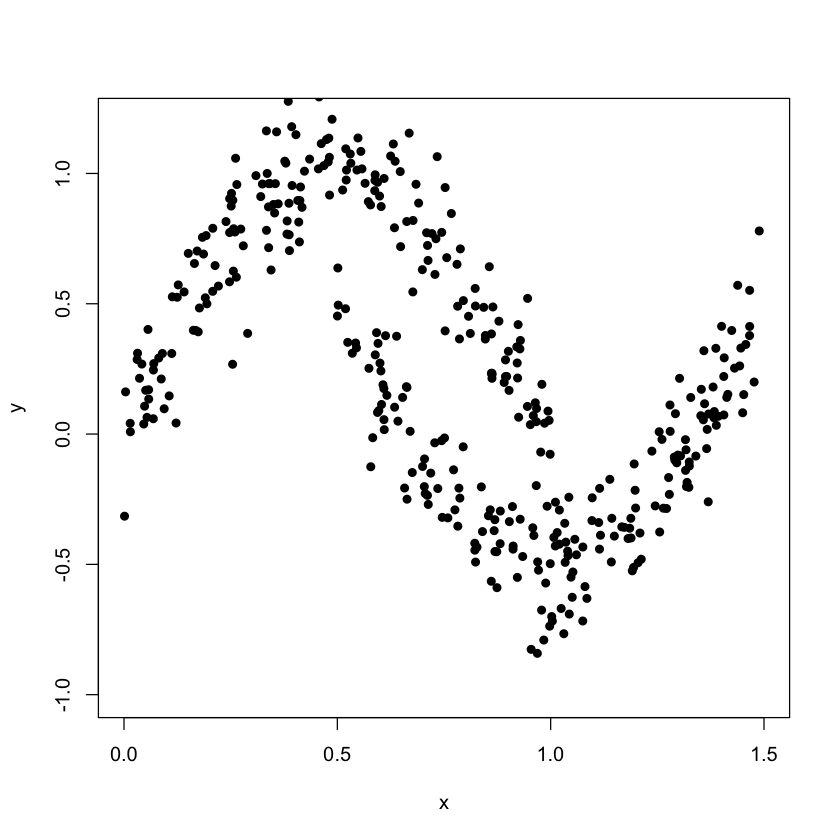

In [6]:
#set.seed(1);
n=200;
x1=runif(n);y1= sin(pi*x1)+rnorm(n)*0.15;
x2=runif(n)+0.5;y2=0.5-sin(pi*(x2-0.5))+rnorm(n)*0.15;
data.mat=rbind(cbind(x1,y1),cbind(x2,y2));
#par(mfrow=c(1,2))
plot(data.mat,pch=16,xlab="x",ylab="y",xlim=c(0,1.5),ylim=c(-1,1.2))
#plot(y1~x1,pch=16,xlab="x",ylab="y",col="red",xlim=c(0,1.5),ylim=c(-1,1.2))
#points(y2~x2,col="blue",pch=16)
#par(mfrow=c(1,1))

**Example 3.** 

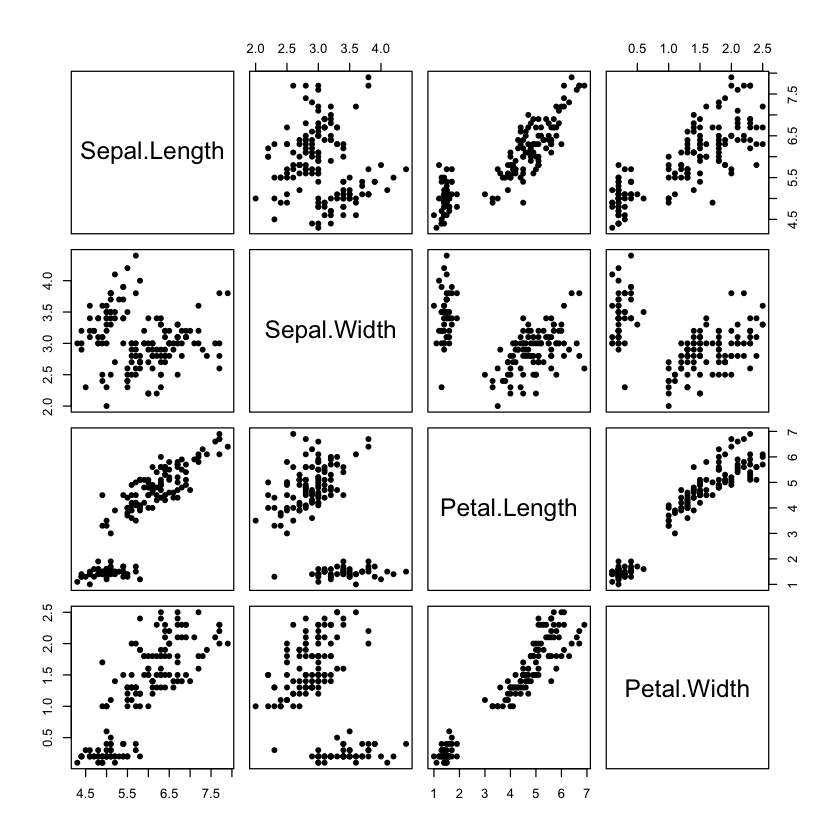

In [7]:
pairs(iris[,-5],pch=16)

## 7.3 Similarity and dissimilarity measures

For simplicity, we consider the case when all features are numeric. The data matrix $X$ is an $n\times p$ matrix with $n$ observations and $p$ features. 

Suppose that we would like to cluster the $n$ observations.  Then, the similarity/dissimilarity measures can be recorded in an $n \times n$ matrix. 

- <span style="color:blue">Similarity measure.</span> A numerical measure $s(i, j)$ that indicates how <span style="color:red">similar</span> two objects are (<span style="color:red">high $s \equiv$ high similarity</span>). Generally normalized to be in $[0,1]$. We know that <span style="color:red">$s(i, j) \ge 0$</span> and <span style="color:red">$s(i, j) = s(j, i)$ </span>
    
    
- <span style="color:blue">Dissimilarity measure.</span> A numerical measure $d(i, j)$ that indicates how <span style="color:red">different</span> two objects are (<span style="color:red">lower $d \equiv$ high similarity</span>). Any **distance** naturally defines a dissimilarity measure. We know that <span style="color:red">$d(i, j) \ge 0$</span> and <span style="color:red">$d(i, j) = d(j, i)$</span>.
    
Note that we can often find a corresponding dissimilarity measure for each similarity measure, and _vice versa_. 

### 7.3.1 Common Dissimilarity Measures
	
**Euclidean** distance: <span style="color:red">sum of squared difference between feature values</span>
$$
d_E(i,j)= \left[ \sum_{l=1}^p (X_{i,l}-X_{j,l})^2  \right]^{1/2}
$$
**Manhattan** distance:
		<span style="color:green">sum of absolute difference between feature values</span>
$$
d_M(i,j)= \sum_{l=1}^p |X_{i,l}-X_{j,l}|
$$


In [8]:
X<-iris[,-5]
d.E<-dist(X,method="euclidean")
d.M<-dist(X,method="manhattan")

### 7.3.2 Common Similarity Measures

The correlation coefficient is a popular choice to measure the similarity between observations.   
	
- <span style="color:red">Pearson correlation:</span> This is the "usual" correlation coefficient, and measures the **linear** association between $X_i$ and $X_j$. 
			
- <span style="color:red">Spearman correlation.</span> This is essentially the Pearson correlation applied to **ranked** observations. The Spearman correlation corresponds to an **increasing monotonic trend** between $X_i$ and $X_j$ (more appropriate for non-Gaussian observations). 
    
- <span style="color:red">Kendall's $\tau$.</span> This correlation coefficient uses directly rankings among pairs of observations. 
		
Among the three correlation coefficients, the Pearson correlation is the most commonly used one for convenience. However, it does not always reflect the "similarity" among observations. For instance, the following example ([link](https://en.wikipedia.org/wiki/Correlation_and_dependence)) contains strikingly different patterns with Pearson correlations all equal to 0.816.
	
<img src="../Figures/Ch7/corrplots.png" style="width:80%"/>


## 7.4 Common clustering methods
	
    
    
	


### 7.4.1 Hierarchical Clustering 
	
Hierarchical clustering gives sequence of solutions organized in a <span style="color:red">hierarchical tree structure</span>, called the <span style="color:red">**dendrogram**</span>
    
**Bottom-Up** or Agglomerative: Start from $n$ individual clusters, and group them together into using a measure of similarity.
- Start from $n$ individual clusters
- At each step, <span style="color:red">merge the closest pair of clusters</span> until all objects form a single cluster
        
**Top-Down** or Divisive: Start from one cluster containing all objects, and break them down using a measure of distance
- Start from 1 cluster
- At each step, <span style="color:red">split the most heterogenous cluster</span> until every cluster has only one member
  

── Attaching core tidyverse packages ───────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "merge"       "height"      "order"       "labels"      "method"     
[6] "call"        "dist.method"

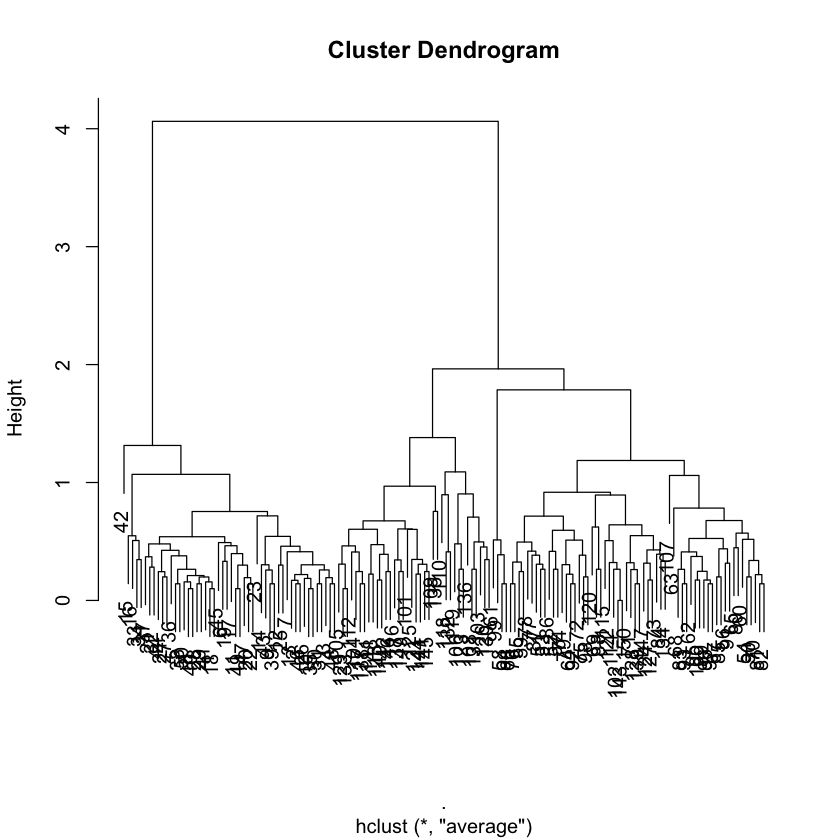

In [1]:
library(tidyverse)
iris.hcl <- iris[,-5] %>%  dist() %>% hclust(method = "average")

names(iris.hcl)
plot(iris.hcl)

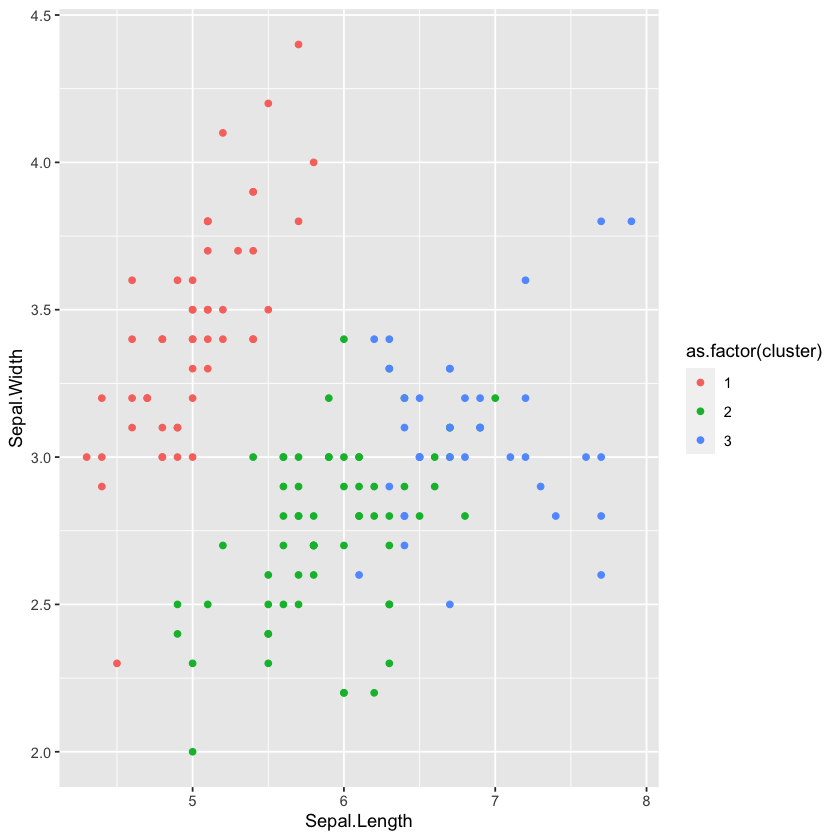

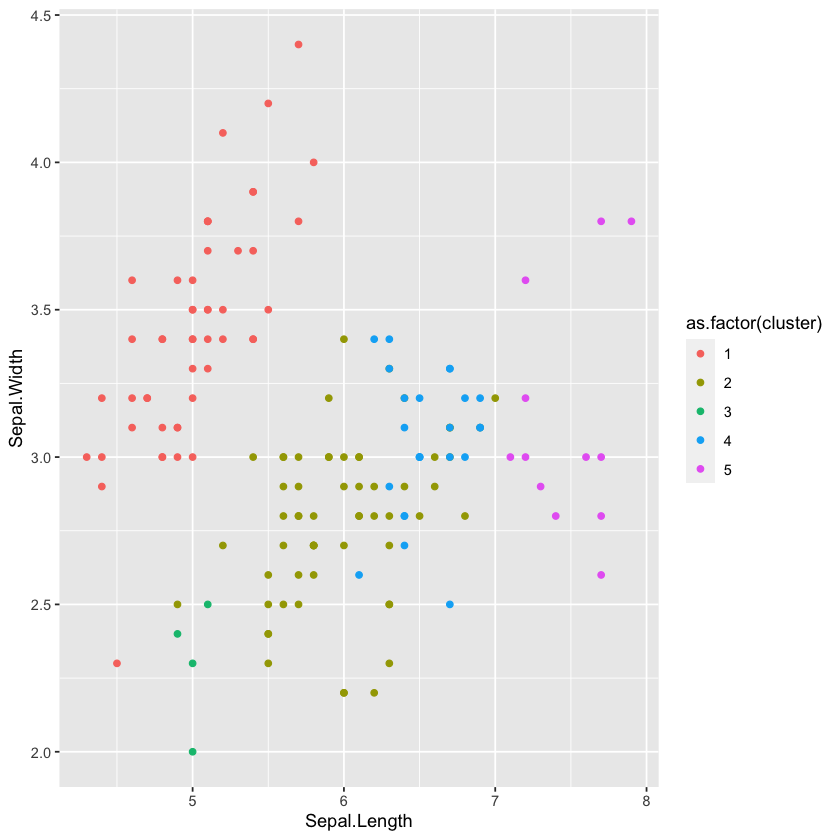

In [2]:

iris %>% mutate(cluster = cutree(iris.hcl,3)) %>%
  ggplot(aes(x=Sepal.Length, y=Sepal.Width, color = as.factor(cluster))) + 
  geom_point()


iris %>% mutate(cluster = cutree(iris.hcl,5)) %>%
  ggplot(aes(x=Sepal.Length, y=Sepal.Width, color = as.factor(cluster))) + 
  geom_point()

### 7.4.2 K-means Clustering

The basic idea of K-means clustering is, given a number of clusters $K$, find the set of cluster centers, and cluster assignments that minimize average distance between each obs and its center. This is the most popular partition-based method. 

- Motivated by a simple and intuitive mathematical problem
- <span style="color:red"> Uses Euclidean distance</span> between points and centers
- Computationally efficient, and can be applied to datasets with a large number of samples (variables)
- <span style="color:red">No hierarchy among clusters</span>, if $K$ is changed, the cluster memberships will also change
	


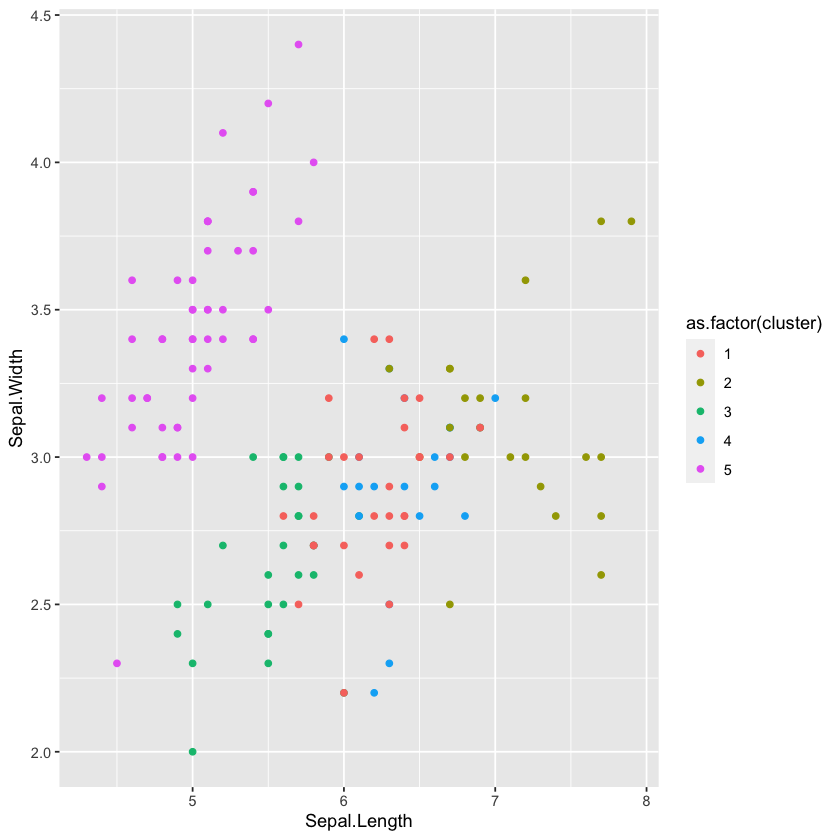

In [9]:
iris.k5 <- iris[,-5] %>%  kmeans(5)
iris %>% mutate(cluster = iris.k5$cluster) %>%
  ggplot(aes(x=Sepal.Length, y=Sepal.Width, color = as.factor(cluster))) + 
  geom_point()

The kmeans method is non-hierarchical, which you can see in the example below. The nodes that belong to the same cluster when we set $K=5$ might be grouped into two distinct clusters when $K=3$. 

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"

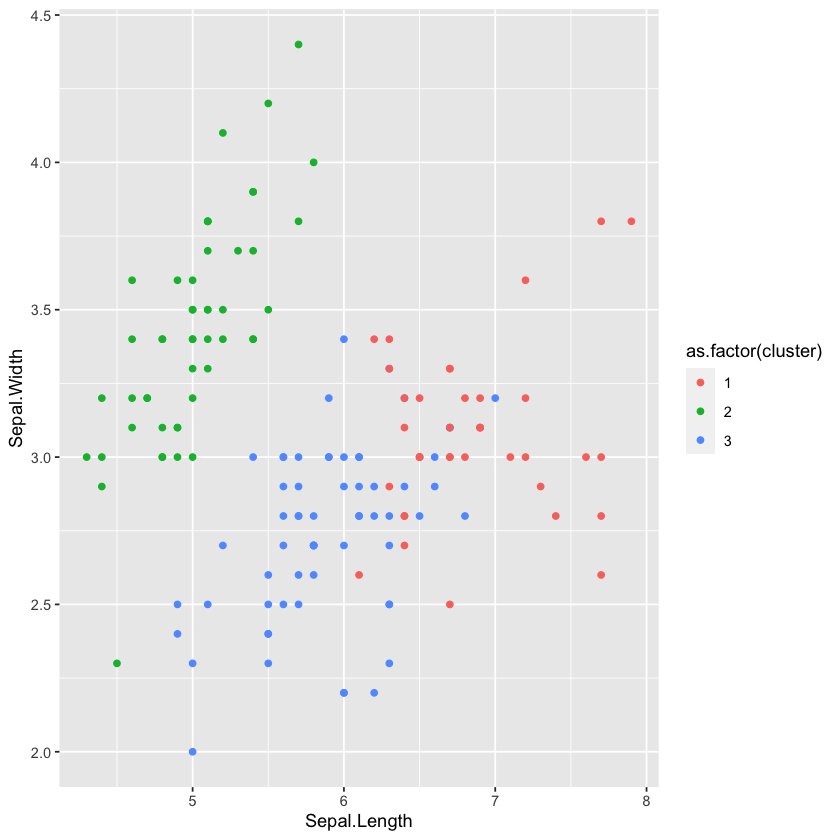

In [10]:
iris.k3 <- iris[,-5] %>% kmeans(3)
names(iris.k3)
iris %>% mutate(cluster = iris.k3$cluster) %>%
  ggplot(aes(x=Sepal.Length, y=Sepal.Width, color = as.factor(cluster))) + 
  geom_point()

Here we apply kmeans clustering using all four variables in `iris` but we can only visualize the data using two variables.

In [5]:
#install.packages('tsne')
library(tsne)

In [11]:
set.seed(1)
iris.tsne <- tsne(iris[,-5], initial_dims = 2)
iris.tsne <- data.frame(iris.tsne)

sigma summary: Min. : 0.376979658833158 |1st Qu. : 0.45299119244845 |Median : 0.509480199794486 |Mean : 0.520650714341092 |3rd Qu. : 0.579571467464058 |Max. : 0.758492715638686 |

Epoch: Iteration #100 error is: 10.571940653913

Epoch: Iteration #200 error is: 0.082927973060846

Epoch: Iteration #300 error is: 0.0804996920467545

Epoch: Iteration #400 error is: 0.079308154457757

Epoch: Iteration #500 error is: 0.0789785659833433

Epoch: Iteration #600 error is: 0.0788488770979662

Epoch: Iteration #700 error is: 0.0787940863273036

Epoch: Iteration #800 error is: 0.0787703185283515

Epoch: Iteration #900 error is: 0.0787592659276179

Epoch: Iteration #1000 error is: 0.0787537976123266



In [12]:
ls(iris.tsne)

[1] "X1" "X2"

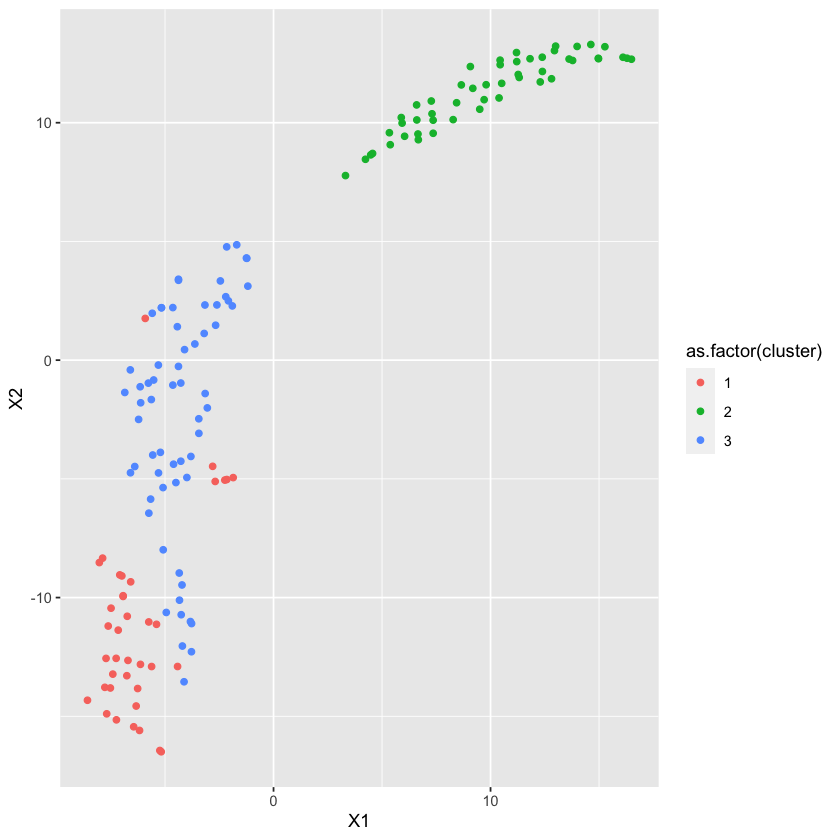

In [13]:
iris.tsne %>% mutate(cluster = iris.k3$cluster) %>%
  ggplot(aes(x=X1, y=X2, color = as.factor(cluster))) + 
  geom_point()

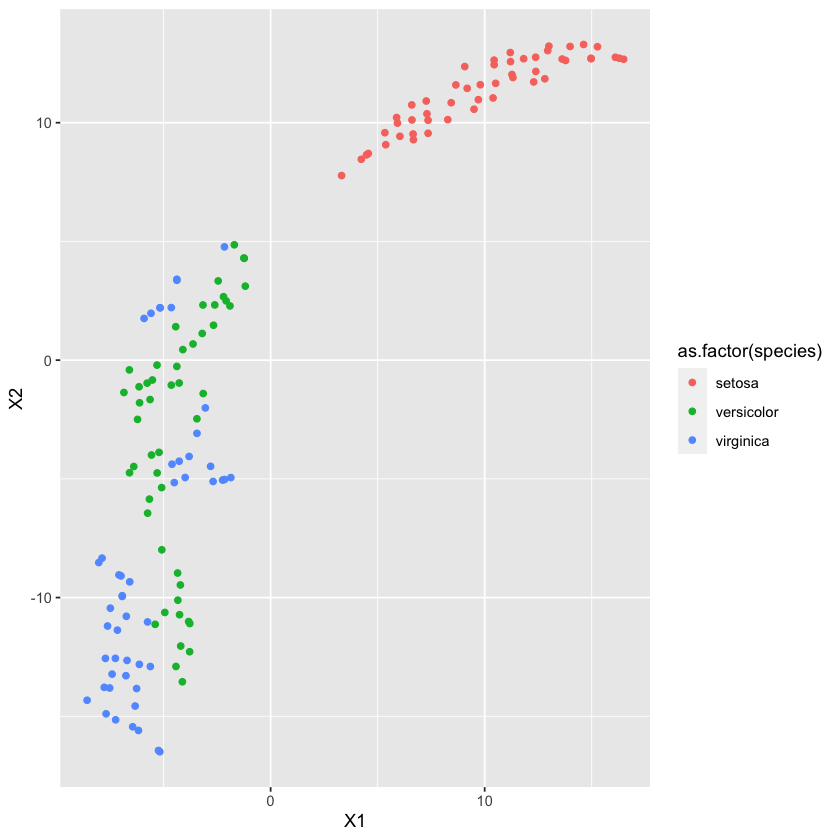

In [14]:
iris.tsne %>% mutate(species = iris[,5]) %>%
  ggplot(aes(x=X1, y=X2, color = as.factor(species))) + 
  geom_point()

### 7.4.3 Spectral clustering 



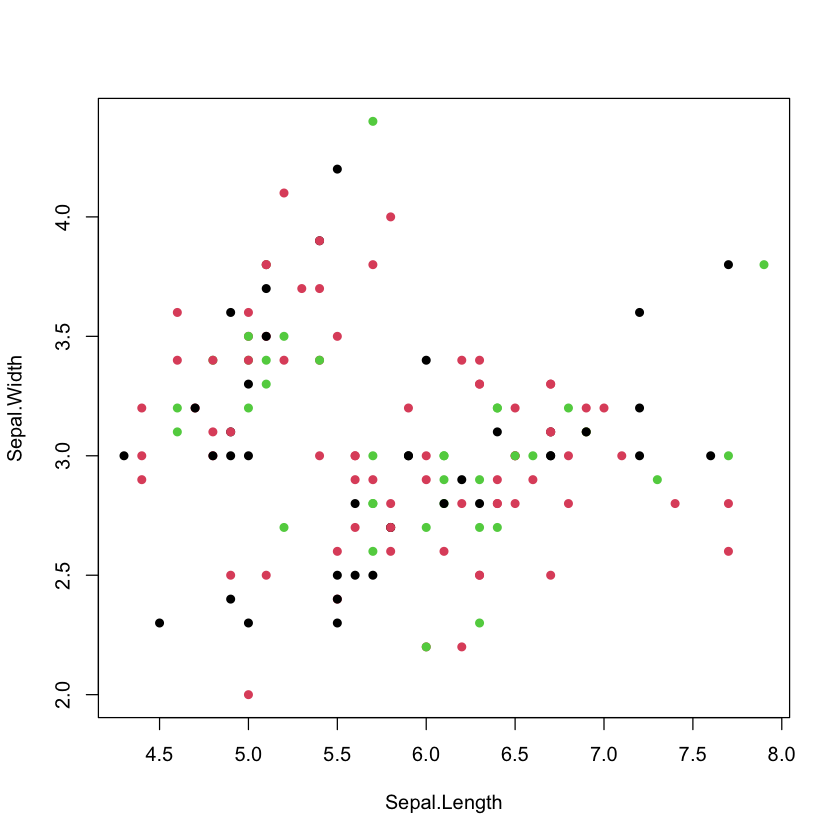

In [1]:
library("kernlab")
iris.spec3=specc(iris[,-5],centers=3)
plot(iris[,c("Sepal.Length","Sepal.Width")],col=iris.spec3,pch=16)

Spectral clustering works very well in Example 2, compared to K-means.

In [2]:
# Data in Example 2
set.seed(1);
n=200;
x1=runif(n);y1= sin(pi*x1)+rnorm(n)*0.15;
x2=runif(n)+0.5;y2=0.5-sin(pi*(x2-0.5))+rnorm(n)*0.15;
data.mat=rbind(cbind(x1,y1),cbind(x2,y2));


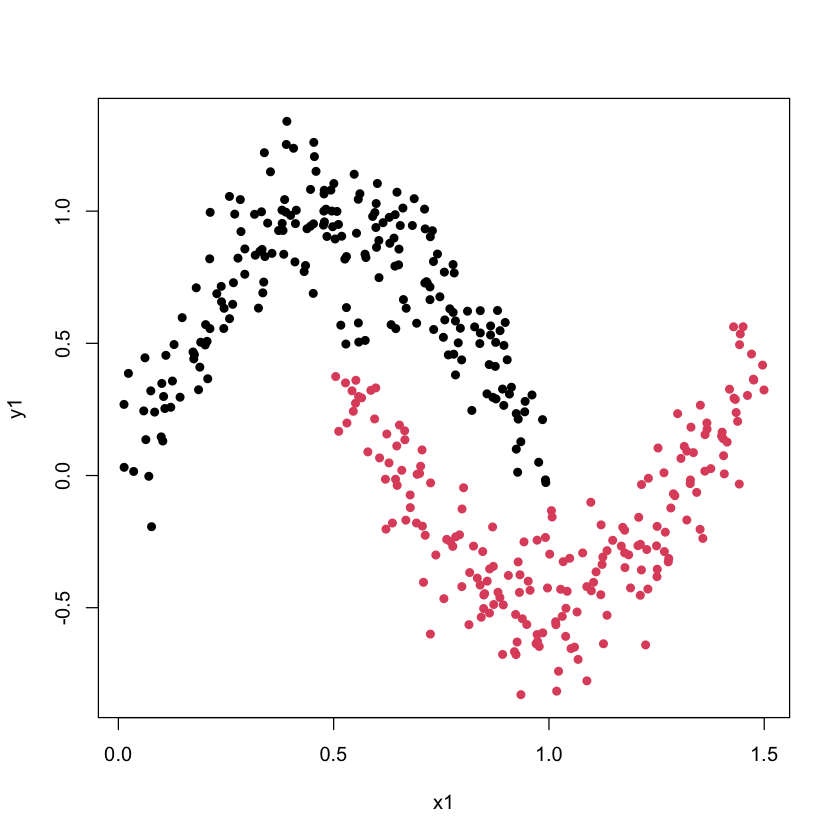

In [3]:
# Spectral clustering: 
ex2.spec2=specc(data.mat,centers=2)
plot(data.mat,col=ex2.spec2,pch=16)

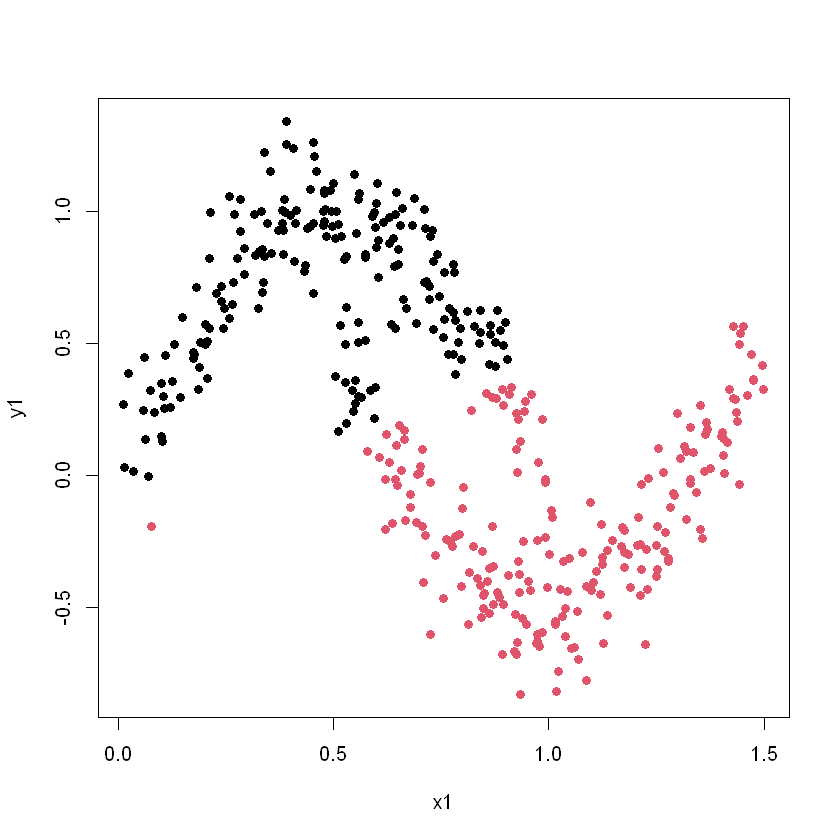

In [11]:
# K-means
ex2.k2=kmeans(data.mat,centers=2)
plot(data.mat,col=ex2.k2$cluster,pch=16)